In [2]:
import pandas as pd
import numpy as np
import pymc3 as pm
import statsmodels.api as sm

### 1.2.1 What is wrong with the following questions?

**a)
"Data show that income and marriage have a high positive correlation. Therefore, your earnings will increase if you get married."**

*Correlation does not imply causation. Higher income causes marriage, not the other way around.*

**b)
"Data show that as the number of fires increase, so does the number of fire fighters. Therefore, to cut down on fires, you should reduce the number of fire fighters."**

*Number of firefighters is caused by fires, so descreasing the fighters would worsen the situation*

**c)
"Data show that people who hurry tend to be late to their meetings. Don't hurry, or you'll be late."**

*It's tardiness that causes hurry, changing whether or not you hurry won't change lateness.*

### 1.2.2 A baseball batter Tim has a better batting average than his teammate Frank. However, someone notices that Frank has a better batting average than Tim against both right-handed and left-handed pitchers. How can this happen? (Present your answer in a table).

In [5]:
table = pd.DataFrame({
    'against': ['left', 'right', 'total'],
    'tim': ['98/100', '5/7', 103/107],
    'frank': ['979/1000', '4/7', 983/1007]
})

table

,against,tim,frank
0,left,98/100,979/1000
1,right,5/7,4/7
2,total,0.962617,0.976167


### 1.2.3 Determine, for each of the following causal stories, whether you should use the aggregate or the segregated data to determine the true effect.

**a)
There are two treatments used on kidney stones: Treatment $A$ and Treatment $B$. Doctors are more likely to use Treatment $B$ on small stones. Should a patient who doesn't know the size of his or her stone examine the general population data, or the stone size-specific data when determining which treatment will be more effective?**

*The treatment and outcome are affected at the same time by severity, which makes severity a confounder. We should first get a value for severity (size of kidney stone), and use segregated data to decide.*

**b)
There are two doctors in a small town. Each has performed 100 surgeries in his career, which are of two types: one very difficult surgery and one very easy surgery. The first doctor performs the easy surgery much more often than the difficult surgery and the second doctor performs the difficult surgery more often than the easy surgery. You need surgery, but you do not know whether your case is easy or difficult. Should you consult the success rate of each doctor over all cases, or should you consult their success rates for the easy and difficult cases separately, to maximize the chance of a successful surgery?**

*Check both doctors success rate separately. Without knowing what size of kidney stone, it's probably the doctor that does the difficult surgery the best. Easier surgeries are by definition, easier, and even if the easy doctor has a slightly better rate of success, the difficult doctor would still be the choice. Use the segregated data and take into account other things, like the time of practice.*

### 1.2.4 In an attempt to estimate the effectiveness of a new drug, a randomized experiment is conducted. In all, 50% of the patients are assigned to receive the new drug and 50% a placebo. A day before the actual experiment, a nurse hands out lollipops to some patients who show signs of depression, mostly among those who have been assigned to treatment the next day (i.e., the nurse's round happened to take her through the treatment-bound ward). Strangely, the experimental data revealed a Simpson's reversal: Although the drug proved benificial to the population as a whole, drug takers were less likely to recover than non-takers, among both lollipop receivers and lollipop nonreceivers. Assuming that lollipop sucking in itself has no effect whatsover on recovery, answer the following questions:

**a) Is the drug beneficial to the population as a whole or harmful?**

*It's beneficial as a whole, but less effective to people with depression.*

**b) Does your answer contradict our gender example, where sex-specific data was deemed more appropriate?**

*In the gender example, the aggregated success rate was misleading, as women were more likely to take the drug, and have higher levels of estrogen, which is has an effect on recovery. This means that in that example, the aggregated data was not representative of the population. It was necessary to use it to make sure that the drug was working and not the estrogen levels. In the current example, we have an inverse case; looking at a subpopulation of depressed people. Depression is known to have adverse effect of recovery, but it's not representative of the population, as it affects a small percentage. So it makes sense to use aggregated data instead of segregated.*

**c)
Draw a graph (informally) that more or less captures the story.**

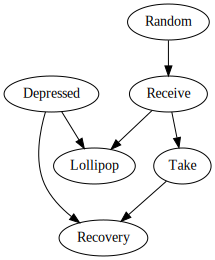

In [77]:
from causalgraphicalmodels import CausalGraphicalModel

new_drug = CausalGraphicalModel(
        nodes = ['Random', 'Depressed', 'Receive', 'Lollipop', 'Take', 'Recovery'],
        edges = [('Random', 'Receive'),
                 ('Receive', 'Take'),
                 ('Receive', 'Lollipop'),
                 ('Take', 'Recovery'),
                 ('Depressed', 'Lollipop'),
                 ('Depressed', 'Recovery')
        ]
)

new_drug.draw()

**d) How would you explain the emergence of Simpson's reversal in this story?**

*The lollipop takers were despressed, and they were going to be treated. People in the lollipop group would be worse on the drug, because they are depressed. Still, they are a small percentage of the population, so the aggregate success rate of the drug is still good.*

**e) Would your answer change if the lollipops were handed out (by the same criterion) a day after the study?**

*Only if the drug had an effect on depression rates.*

## 1.3 Probability and Statistics**

### 1.3.1 Identify the variables and events invoked in the lollipop story of Study question 1.2.4**

In [7]:
table = pd.DataFrame({
    'variables': ['Random', 'Depressed', 'Receive', 'Lollipop', 'Take', 'Recovery'],
    'events': ['T, F', 'T, F', 'T, F', 'T, F', 'T, F', 'T, F']
})

table

,variables,events
0,Random,"T, F"
1,Depressed,"T, F"
2,Receive,"T, F"
3,Lollipop,"T, F"
4,Take,"T, F"
5,Recovery,"T, F"


### 1.3.2 Consider Table 1.5 showing the relationship between gender and education level in the U.S. adult population.

In [21]:
table_1p5 = pd.DataFrame({
    'gender': ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female'],
    'highest education achieved': ['never finished high school',
                                   'high school',
                                   'college',
                                   'graduate school',
                                   'never finished high school',
                                   'high school',
                                   'college',
                                   'graduate school'],
    'occurrence': [112, 231, 595, 242, 136, 189, 763, 172]
})

table_1p5

,gender,highest education achieved,occurrence
0,male,never finished high school,112
1,male,high school,231
2,male,college,595
3,male,graduate school,242
4,female,never finished high school,136
5,female,high school,189
6,female,college,763
7,female,graduate school,172


**a) Estimate $P(High School)$**

In [22]:
table_1p5[table_1p5['highest education achieved']=='high school']['occurrence'].sum()/table_1p5['occurrence'].sum()

0.1721311475409836

**b) Estimate $P(\text{High School OR Female})$**

In [27]:
table_1p5[
    (table_1p5['highest education achieved']=='high school') |
    (table_1p5['gender']=='female')
]['occurrence'].sum()/table_1p5['occurrence'].sum()

0.6110655737704918

**c) Estimate $P(\text{High School | Female})$**

In [30]:
table_1p5[
    (table_1p5['highest education achieved']=='high school') &
    (table_1p5['gender']=='female')
]['occurrence'].sum()/table_1p5[
    (table_1p5['gender']=='female')
]['occurrence'].sum()

0.15

**d) Estimate $P(\text{Female | High School})$**

In [31]:
table_1p5[
    (table_1p5['gender']=='female') &
    (table_1p5['highest education achieved']=='high school')
]['occurrence'].sum()/table_1p5[
    (table_1p5['highest education achieved']=='high school')
]['occurrence'].sum()

0.45

### 1.3.3 Consider the casino problem described in Section 1.3.7

**a) Compute $P(\text{Craps | "11"})$ assuming that there are twice as many roulette tables as crap games at the casino.**

$$P(\text{Craps | "11"}) = \frac{P(\text{"11" | Craps})P(\text{Craps})}{P(\text{"11"})}$$

In [37]:
# if same number of tables exist in the casino
hypothesis = 'craps'
evidence = '11'
p_craps = 1/18 # 2/36 cases where 11 can be called in a game of craps: P('11'|craps)
p_roulette = 1/38 # cases where 11 can be called in a game of roulette: P('11'|roulette)
p_game_of_craps = 1/2 # same number of roulettes and craps

p_11 = p_craps*p_game_of_craps+(1-p_game_of_craps)*p_roulette

(p_craps*p_game_of_craps)/(p_11)

0.6785714285714286

In [38]:
# if twice the number of roulette tables than craps:
hypothesis = 'craps'
evidence = '11'
p_craps = 1/18 # 2/36 cases where 11 can be called in a game of craps: P('11'|craps)
p_roulette = 1/38 # cases where 11 can be called in a game of roulette: P('11'|roulette)
p_game_of_craps = 1/3 # twice the number of roulettes than craps

p_11 = p_craps*p_game_of_craps+(1-p_game_of_craps)*p_roulette

(p_craps*p_game_of_craps)/(p_11)

0.5135135135135135

**b) Compute $P(\text{Roulette | "10"})$ assuming that there are twice as many crap tables as roulette games at the casino.**

$$P(\text{Roulette | "10"}) = \frac{P(\text{"10" | Roulette})P(\text{Roulette})}{P(\text{"10"})}$$

In [43]:
# if twice the number of crap tables than roulette:
hypothesis = 'roulette'
evidence = '10'
p_craps = 3/36 # cases where 10 can be called in a game of craps: P('10'|craps)
p_roulette = 1/38 # cases where 10 can be called in a game of roulette: P('10'|roulette)
p_game_of_craps = 2/3 # twice number of craps than roulettes

p_10 = p_roulette*(1-p_game_of_craps)+p_game_of_craps*p_craps

(p_roulette*(1-p_game_of_craps))/(p_10)

0.13636363636363638

### 1.3.4 Suppose we have three cards. Card 1 has two black faces, one on each side; Card 2 has two white faces; and Card 3 has one white face and one black face. You select a card at random and place it on the table. You find that it is black on the face-up side. What is the probability that the face-down side of the card is also black?

**a) Use your intuition to argue that the probability that the face-down side of the card is also black is $\frac{1}{2}$. Why might it be greater than $\frac{1}{2}$?**

$$I = \text{Identity of the selected card (Card 1, Card 2, Card 3)}$$
$$C_D = \text{Color of face down side (B, W)}$$
$$C_U = \text{Color of face up side (B, W)}$$

We know one side is black, so $I=1$ and $I=3$. Out of those, half has other side as black, so intuitively, one could think that the face-down side of the card is also black is $\frac{1}{2}$. However, it might be greater than $\frac{1}{2}$ in the case that we are allowed to flip cards when shuffling.

**b) Express the probabilities and conditional probabilties that you find easy to estimate (for example, $P(C_D = \text{Black})$), in terms of the variables above.**

$P(I = 1) = \frac{1}{3}$

$P(I = 2) = \frac{1}{3}$

$P(I = 3) = \frac{1}{3}$

$P(C_D = Black | C_U = Black, I = 1) = 1$

$P(C_D = Black | C_U = Black, I = 2) = 0$

$P(C_D = Black | C_U = Black, I = 3) = 0$

In [46]:
class Card():
    def __init__(self, side_1=None, side_2=None):
        self.side_1 = side_1
        self.side_2 = side_2
        self.up = self.side_1
        self.down = self.side_2
        
    def flip(self):
        if np.random.binomial(1, 0.5):
            self.up = self.side_2
            self.down = self.side_1
        else:
            self.up = self.side_1
            self.down = self.side_2
            
    def up(self):
        return self.up
    
    def down(self):
        return self.down

In [47]:
card = Card(side_1='B', side_2='W')

In [48]:
card.flip()

In [49]:
print('up', card.up, 'down', card.down)

up B down W


In [50]:
card_1 = Card(side_1='B', side_2='B')
card_2 = Card(side_1='W', side_2='W')
card_3 = Card(side_1='W', side_2='B')

cards = [card_1, card_2, card_3]

ups = []
downs = []

for i in range(10000):
    card = np.random.choice(cards)
    card.flip()
    ups.append(card.up)
    downs.append(card.down)

In [51]:
card_picks = pd.DataFrame({
    'up': ups,
    'down': downs
})

card_picks

,up,down
0,W,W
1,W,W
2,W,W
3,W,W
4,B,W
...,...,...
9995,B,B
9996,W,B
9997,B,B
9998,B,B


In [52]:
card_picks[
    (card_picks['up'] == 'B') & \
    (card_picks['down'] == 'B')
].shape[0]

3261

In [53]:
card_picks[card_picks['up'] == 'B'].shape[0]

5019

In [54]:
card_picks[
    (card_picks['up'] == 'B') & \
    (card_picks['down'] == 'B')
].shape[0] / card_picks[card_picks['up'] == 'B'].shape[0]

0.6497310221159593

### 1.3.5 Prove, using Bayes' theorem, that switching doors improves your chances of winning the car in the Monty Hall problem.

If $H$ stands for the host's choice, $Y$ for your choice and $L$ for the car's location, what we want to know is $P(L = 2 | Y = 1, H = 3)$ where each variable can take $[1, 2, 3]$

$$P(L=2|Y=1,H=3) = \frac{P(H=3, Y=1, L=2)}{P(H=3, Y=1)}\\ = \frac{P(H=3|Y=1, L=2)\times P(Y=1,L=2)}{P(H=3, Y=1)}\\ = \frac{1.0\times P(Y=1)\times P(L=2))}{P(H=3, Y=1)}\\ = \frac{\frac{1}{9}}{P(H=3, Y=1)}\\ = \frac{\frac{1}{9}}{\sum_l{P(H=3,Y=1,L=l)}}\\ = \frac{\frac{1}{9}}{\sum_l{P(H=3|Y=1,L=l)P(Y=1,L=l)}}\\ = \frac{\frac{1}{9}}{1\times \frac{1}{9}+\frac{1}{2}\times \frac{1}{9}+0\times \frac{1}{9}}\\ = \frac{\frac{1}{9}}{\frac{1}{6}}\\ = \frac{2}{3}$$

### 1.3.6 

**a) Prove that, in general, both $\sigma_{XY}$ and $\rho_{XY}$ vanish when $X$ and $Y$ are independent. Hint: Use Eqs. (1.16) and (1.17).**

$$\rho_{X, Y} = \frac{\sigma_{XY}}{\sqrt{Var(X)\sqrt{Var(Y)}}}\\ = 0$$

**b) Give an example of two variables that are highly dependent and, yet, their correlation coefficient vanishes.**

Example: $f(x)$ and $f(y) = x^2$

In [55]:
x = np.random.uniform(low=-1,high=1, size=10000)
x_squared = x**2

np.corrcoef(x, x_squared)

array([[ 1.        , -0.00449718],
       [-0.00449718,  1.        ]])

### 1.3.7 Two fair coins are flipped simultaneously to determine the payoffs of two players in the town's casino. Player 1 wins a dollar if and only if at least one coin lands on head. Player 2 receives a dollar if and only if the two coins land on the same face. Let $X$ stand for the payoff of Player 1 and $Y$ for the payoff of Player 2.

**a) Find and describe the probability distributions**

$$P(x), P(y), P(x, y), P(x|y), P(y|x)$$

$$P(y)=P(C_1=h, C_1=h)+P(C_1=t, C_1=t)=0.5$$

$$P(y|x) = \frac{P(x,y)}{P(x)}\\ = \frac{0.25}{0.75}\\ = \frac{1}{3}$$

**b) Using the descriptions in (a), compute the following measures:**

$$\rho_{X,Y} = \frac{Cov(X, Y)}{\sqrt{Var(X)\sqrt{Var(Y)}}}\\=\\ = \frac{-0.125}{\sqrt{0.1875}\sqrt{0.25}}\\=-0.577$$

In [56]:
-0.125 /(np.sqrt(0.1875)*np.sqrt(0.25))

-0.5773502691896258

**c) Given that Player 2 won a dollar, what is your best guess of Player 1's payoff?**

$$E[X|Y=y] = \sum_x^1 xP(X=x|Y=y)$$
$\text{50 cents}$

**d) Given that Player 1 won a dollar, what is your best guess of Player 2's payoff?**

$$E[Y|X=x] = \sum_y^1 yP(Y=y|X=x)$$
$\text{33 cents}$


**e)Are there two events, $X=x$ and $Y=y$, that are mutually independent?**

No, because $X=x$ means $Y\neq{y}$ and the other way aronud.

### 1.3.8 Compute the following theoretical measures of the outcome fo a single game of craps (one roll of two independent dice), where $X$ stands for the outcome of Die 1, $Z$ for the outcome of Die 2, and $Y$ for their sum.

In [59]:
table = pd.DataFrame({
    'roll': ['roll1', 'roll2','roll3','roll4','roll5','roll6','roll7','roll8','roll9','roll10','roll11','roll12'],
    'X: Die 1': [6,3,4,6,6,5,1,3,6,3,5,4],
    'Z: Die 2': [3,4,6,2,4,3,5,5,5,5,3,5],
    'Y: Sum': [9,7,10,8,10,8,6,8,11,8,8,9],
})

table

,roll,X: Die 1,Z: Die 2,Y: Sum
0,roll1,6,3,9
1,roll2,3,4,7
2,roll3,4,6,10
3,roll4,6,2,8
4,roll5,6,4,10
5,roll6,5,3,8
6,roll7,1,5,6
7,roll8,3,5,8
8,roll9,6,5,11
9,roll10,3,5,8


**a)**

$$E[X], E[Y], E[Y|X=x], E[X|Y=y], \text{for each value of x and y, and}\\ Var(X), Var(Y), Cov(X, Y), \rho_XY, Cov(X, Z))$$

$$E[X]=3.5$$

In [60]:
np.arange(1, 7).mean()

3.5

$$E[Y] = E[Y] + E[Z]\\ = 2\times3.5\\=7$$

In [62]:
(np.array([1,2,3,4,5,6,5,4,3,2,1])/36*np.arange(2, 13)).sum()

6.999999999999998

$$E[Y|X=x] = E[Z+x|X=x]\\=E[Z|X=x]+E[x|X=x]\\=E[Z+x|X=x]+x\\=\sum_z{z}P(Z=z|X=x)+x\\=\sum_z{z}P(Z=z)+x\\=3.5+x$$

$$E[X|Y=y] = E[y-Z|Y=y]\\=E[y|Y=y]-E[Z|Y=y]\\=E[y|Y=y]-E[X|Y=y]\\=\frac{E[y|Y=y]}{2}\\=\frac{y}{2}$$

In [64]:
np.arange(1,7).var()

2.9166666666666665

$$Var(X)=E[X^2]-E[X]^2\\=\sum_{x=1}^6x^2P(X=x)-3.5^2\\=2.916$$

In [65]:
(np.arange(2,13)**2 * (np.array([1,2,3,4,5,6,5,4,3,2,1]) / 36)).sum() - 49

5.833333333333336

$$Var(Y)=E[Y^2]-E[Y]^2\\=\sum_{x=2}^12y^2P(Y=y)-7^2\\=54.83-49\\=5.83$$

In [66]:
(np.arange(1,7)**2 / 6).sum() - 3.5**2

2.916666666666668

$$Cov(X,Y)=E[XY]-E[X]E[Y]\\=E(X(X+Z))-E(X)E(X+Z)\\=E(X(X+Z))-E(X)2E(X)\\=E(X(X+Z))-2\times3.5^2\\=E(X(X+Z))-24.5\\=E(X^2+XZ)-24.5\\=E(X^2)+E(XZ)-24.5\\=E(X^2)+E(X)E(Z)-24.5\\=E(X^2)\times3.5^2-24.5\\=E(X^2)-12.25\\=\sum_{x}x^2P(X=x)-24.5\\=15.16-12.25\\=2.916$$

In [67]:
x = np.random.choice(np.arange(1,7),size=100000)
z = np.random.choice(np.arange(1,7),size=100000)
y = x+z

np.cov(x, y)

array([[2.92478643, 2.92042802],
       [2.92042802, 5.8353032 ]])

In [68]:
np.cov(x,z)

array([[ 2.92478643, -0.00435841],
       [-0.00435841,  2.91923359]])

In [69]:
np.sqrt(2.9166666666) / np.sqrt(5.83333333333)

0.7071067811786683

$$\rho(X,Y)=\frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}\\=\frac{2.916}{\sqrt{2.916}\sqrt{5.835}}\\=\frac{\sqrt{2.916}}{\sqrt{5.83}}\\=0.70$$

In [70]:
np.corrcoef(x,y)

array([[1.        , 0.70691584],
       [0.70691584, 1.        ]])

$$Cov(X,Z) = 0\space \text{X, Y are independent.}$$

**b) Find the sample estimates of the measures computed in (a), based on the data from Table 1.6 [Hint: Many software packages are available for doing this computation for you.]**

In [73]:
for i in range(1, 7):
    print('E(Y|X=' + str(i) + '):', table[table['X: Die 1'] == i]['Y: Sum'].mean())

E(Y|X=1): 6.0
E(Y|X=2): nan
E(Y|X=3): 7.666666666666667
E(Y|X=4): 9.5
E(Y|X=5): 8.0
E(Y|X=6): 9.5


In [74]:
print('sample estimates: ')
print('E(X): ', table['X: Die 1'].mean())
print('E(Y): ', table['Y: Sum'].mean())

for i in range(1,7):
    print('E(Y|X=' + str(i) + '):', table[table['X: Die 1'] == i]['Y: Sum'].mean())

for i in range(2,13):
    print('E(X|Y=' + str(i) + '):', table[table['Y: Sum'] == i]['X: Die 1'].mean())
    
print('Var(X): ', table['X: Die 1'].var())
print('Var(Y): ', table['Y: Sum'].var())
print('Cov(X,Y) Matrix: ', np.cov(table['X: Die 1'], table['Y: Sum']))
print('Corr coeff Matrix: ', np.corrcoef(table['X: Die 1'], table['Y: Sum']))
print('Cov(X,Z) Matrix: ', np.cov(table['X: Die 1'], table['Z: Die 2']))

sample estimates: 
E(X):  4.333333333333333
E(Y):  8.5
E(Y|X=1): 6.0
E(Y|X=2): nan
E(Y|X=3): 7.666666666666667
E(Y|X=4): 9.5
E(Y|X=5): 8.0
E(Y|X=6): 9.5
E(X|Y=2): nan
E(X|Y=3): nan
E(X|Y=4): nan
E(X|Y=5): nan
E(X|Y=6): 1.0
E(X|Y=7): 3.0
E(X|Y=8): 4.4
E(X|Y=9): 5.0
E(X|Y=10): 5.0
E(X|Y=11): 6.0
E(X|Y=12): nan
Var(X):  2.606060606060606
Var(Y):  1.9090909090909092
Cov(X,Y) Matrix:  [[2.60606061 1.54545455]
 [1.54545455 1.90909091]]
Corr coeff Matrix:  [[1.         0.69286827]
 [0.69286827 1.        ]]
Cov(X,Z) Matrix:  [[ 2.60606061 -1.06060606]
 [-1.06060606  1.42424242]]


**c) Use the results in (a) to determine the best estimate of the sum, $Y$, given that we measured X=3.**

$$E[Y|X=x]=3.5+x\\=3.5+3\\=6.5$$


**d)
What is the best estimate of $X$, given that we measured $Y=4$?**

$$E[X|Y=y]=\frac{y}{2}\\=4+2\\=2$$

**e) What is the best estimate of $X$, given that we measured $Y=4$ and $Z=1$? Explain why it is not the same as in (d).**

Knowing the values of $Y$ and $Z$ means we can exactly estimate $X$, in this case $X=3$



### 1.3.9 

**a) Prove Eq. (1.22) using the orthogonality principle. [Hint: Follow the treatment of Eq. (1.26).]**

$$Y=\alpha+b X+\epsilon$$

$$XY=\alpha X+b X^2+\epsilon$$

$$E[XY]=\alpha E[X]+b E[X^2]\\=(E[Y] - b E[X])E[X]+bE[X^2]\\=E[X]E[Y]-bE[X^2]+bE[X^2]$$

$$\sigma_{XY}=b\sigma^2_X\\=\frac{\sigma_{XY}}{\sigma^2_X}=b$$

**b) Find all partial regression coefficients for the craps game described in Study question 1.3.7. [Hint: Apply Eq. (1.27) and use the variances and covariances computed for part (a) of this question.]**

$$R_{YX\cdot Z}, R_{XY\cdot Z}, R_{YZ\cdot X}, R_{ZY\cdot X}, R_{XZ\cdot Y}, R_{ZX\cdot Y}$$


$$Y=a X+b Z+\alpha +\epsilon$$

$$E[Y] = aE[X]+bE[Z]+\alpha$$

$$\alpha=E[Y]-aE[X]-bE[Z]$$

**TODO: finish this**

### 1.4.1

**a) Name all the parents of Z**

$W, Y$

**b) Name all the ancestors of Z**

$W, X, Y$

**c) Name all the children of W**

$Z, Y$

**d) Name all the descendants of W**

$Z, Y, T$

**e) Draw all the simple paths between X and T (no node should appear more than once)**

$X\longrightarrow Y\longrightarrow Z\longrightarrow T$

$X\longrightarrow Y\longrightarrow T$

**f) Draw all the directed paths between X and T**

$X\longrightarrow Y\longrightarrow Z\longrightarrow T$

$X\longrightarrow W\longrightarrow Y\longrightarrow T$

$X\longrightarrow W\longrightarrow Z\longrightarrow T$


### 1.5.1 Suppose we have the following SCM. Assume all exogenous variables are independent and that the expected value of each is 0.

$$V=\{X,Y,Z\}, U=\{U_X, U_Y, U_Z\}, F=\{f_1, f_2\}$$

$$f_X  \colon X=u_X$$

$$f_Y  \colon Y=\frac{X}{3}+U_Y$$

$$f_Z  \colon Z=\frac{Y}{16}+U_Z$$

**a) Draw the graph that complies with the model**

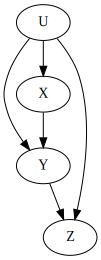

In [78]:
model = CausalGraphicalModel(
        nodes = ['X', 'Y', 'Z', 'U'],
        edges = [('U', 'X'),
                 ('U', 'Y'),
                 ('X', 'Y'),
                 ('U', 'Z'),
                 ('Y', 'Z'),
        ]
)

model.draw()

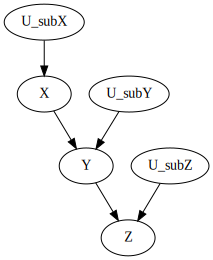

In [79]:
model = CausalGraphicalModel(
        nodes = ['U_subX', 'U_subY', 'U_subZ', 'X', 'Y', 'Z'],
        edges = [('U_subX', 'X'),
                 ('U_subY', 'Y'),
                 ('U_subZ', 'Z'),
                 ('X', 'Y'),
                 ('Y', 'Z'),
        ]
)

model.draw()

**b) Determine the best guess of the value (expected value) of $Z$, given that we observe $Y=3$.**

$$R[Z|Y=3]=R_{ZY}\cdot3\\=\frac{\sigma_{ZY}}{\sigma_Y^2}\cdot3$$

In [80]:
u_x = np.random.normal(size=10000)
u_y = np.random.normal(size=10000)
u_z = np.random.normal(size=10000)

X = u_x
Y = X/3 + u_y
Z = Y/16 + u_z

df = pd.DataFrame({
    'x': X,
    'y': Y,
    'z': Z
})


with pm.Model() as R_ZY_model:
    slope_Y = pm.Normal('slope_Y', mu = 0, sd = 5)
    mu = pm.Deterministic('mu', slope_Y * Y)
    sigma = pm.HalfCauchy('sigma', beta=5)
    pm.Normal('Z', mu, sigma, observed=Z)
    
    R_ZY_traces = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope_Y]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.


/Users/danielsanchez/.virtualenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'slope_Y'}>,
        <AxesSubplot:title={'center':'slope_Y'}>]], dtype=object)

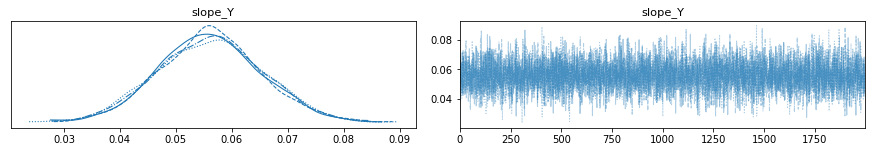

In [82]:
pm.traceplot(R_ZY_traces, var_names=['slope_Y'])

In [83]:
(R_ZY_traces['slope_Y']*3).mean()

0.16844315678139277

In [84]:
(np.cov(Z,Y)[0][1] / np.var(Y)) * 3

0.16860900073737928

**c) Determine the best guess of the value of $Z$, given that we observe $X=3$**

$$R[Z|X=3]=R_{ZX}\cdot3\\=\frac{\sigma_{ZX}}{\sigma_X^2}\cdot3$$

In [85]:
with pm.Model() as R_ZX_model:
    slope_X = pm.Normal('slope_X', mu = 0, sd = 5)
    mu = pm.Deterministic('mu', slope_X * X)
    sigma = pm.HalfCauchy('sigma', beta=5)
    pm.Normal('Z', mu, sigma, observed=Z)
    
    R_ZX_traces = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope_X]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 15 seconds.


/Users/danielsanchez/.virtualenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'slope_X'}>,
        <AxesSubplot:title={'center':'slope_X'}>]], dtype=object)

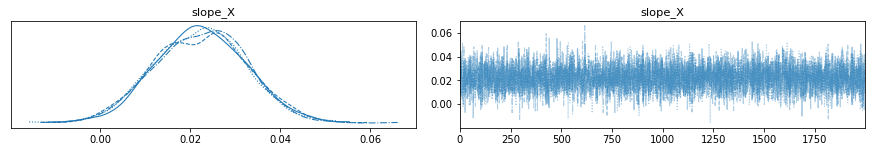

In [86]:
pm.traceplot(R_ZX_traces, var_names=['slope_X'])

In [88]:
(R_ZX_traces['slope_X']*3).mean()

0.0667886895003672

In [89]:
(np.cov(Z,X)[0][1] / np.var(X)) * 3

0.0665270755801658

**d) Determine the best guess of the value of $Z$, given that we observe $X=1$ and $Y=3$.**

See b

In [90]:
with pm.Model() as full_model:
    slope_X = pm.Normal('slope_X', mu = 0, sd = 5)
    slope_Y = pm.Normal('slope_Y', mu = 0, sd = 5)
    mu = pm.Deterministic('mu', slope_X * X + slope_Y * Y)
    sigma = pm.HalfCauchy('sigma', beta=5)
    pm.Normal('Z', mu, sigma, observed=Z)
    
    full_model_traces = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope_Y, slope_X]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.


In [91]:
full_model_traces['slope_X'].mean() * 1 + full_model_traces['slope_Y'].mean() * 3

0.16904286329655915

In [92]:
(R_ZY_traces['slope_Y'] * 3).mean()

0.16844315678139277

**e) Assume that all exogenous variables are normally distributed with zero means and unit variance, that is, $\sigma = 1$.**

**i) Determine the best guess of $X$, given that we observed $Y=2$.**



In [93]:
(np.cov(X,Y)[0][1] / np.var(Y)) * 2

0.6142004087898816

**f) Determine the best guess of the value of $Z$, given that we know $X=3$.**

In [94]:
(np.cov(Z,Y)[0][1] / np.var(Y)) * 3

0.16860900073737928